In [1]:
import torch
torch.cuda.is_available()

False

In [1]:
import torch
import numpy as np
a = torch.FloatTensor(3, 2)
a

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [2]:
a.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

To clear the tensor's content we use the function "zero_()"

Another way to create a tensor by its constructor is to provide a Python iterable (for example, a list or tuple), which will be used as the contents of the newly created tensor:

In [3]:
torch.FloatTensor([[1,2,3],[3,2,1]])

tensor([[1., 2., 3.],
        [3., 2., 1.]])

creating the same tensor with zeros using NumPy

In [4]:
n = np.zeros(shape=(3, 2))
n

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
b = torch.tensor(n)
b

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)

The torch.tensor method accepts the NumPy array as an argument and creates a tensor of appropriate shape from it. In the preceding example, we created a NumPy array initialized by zeros, which created a double (64-bit float) array by default. So, the resulting tensor has the DoubleTensor type 

Usually, in DL, double precision is not required and it adds an extra memory and performance overhead. Common practice is to use the 32-bit float type, or even the 16-bit float type, which is more than enough. To create such a tensor, you need to specify explicitly the type of NumPy array:

In [6]:
n = np.zeros(shape=(3, 2), dtype=np.float32)
b = torch.tensor(n)
b

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

As an option, the type of the desired tensor could be provided to the torch.tensor function in the dtype argument. However, be careful, since this argument expects to get a PyTorch type specification and not the NumPy one. PyTorch types are kept in the torch package, for example, torch.float32, torch.uint8.

In [7]:
n = np.zeros(shape=(3,2))
torch.tensor(n, dtype=torch.float32)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

### Scalar Tensor

zero-dimensional tensors are natively supported and returned by the appropriate functions, and they can be created by the torch.tensor() function. For accessing the actual Python value of such a tensor, there is the special item() method

In [9]:
a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [10]:
s = a.sum() # .sum() function will add all values of tensors 
            # and give a scalar tensor output
s

tensor(6)

In [11]:
s.item()

6

In [12]:
torch.tensor(1)

tensor(1)

## Tensor Operations

besides the inplace and functional variants that we already discussed (that is, with and without an underscore, like abs() and abs_()), there are two places to look for operations: the torch package and the tensor class. In the first case, the function usually accepts the tensor as an argument. In the second, it operates on the called tensor

Most of the time, tensor operations are trying to correspond to their NumPy equivalent, so if there is some not-very-specialized function in NumPy, then there is a good chance that PyTorch will also have it. 

Examples are   
torch.stack()   
torch.transpose()  
torch.cat()  

## GPU tensors			

PyTorch transparently supports CUDA GPUs, which means that all operations have two versions—CPU and GPU—that are automatically selected. The decision is made based on the type of tensors that you are operating on. 			

Every tensor type that I mentioned is for CPU and has its GPU equivalent. The only difference is that GPU tensors reside in the ```torch.cuda``` package, instead of just torch. For example, ```torch.FloatTensor``` is a 32-bit float tensor that resides in CPU memory, but ```torch.cuda.FloatTensor``` is its GPU counterpart.

To convert from CPU to GPU, there is a tensor method, ```to(device)```, that creates a copy of the tensor to a specified device (this could be CPU or GPU). If the tensor is already on the device, nothing happens and the original tensor will be returned.

First of all, you can just pass a string name of the device, which is ```"cpu"``` for CPU memory or ```"cuda"``` for GPU. 

A GPU device could have an optional device index specified after the colon; for example, the second GPU card in the system could be addressed by "cuda:1" (index is zero-based).

In [20]:
# ca = a.to('cuda') # This will give error since we dont have cuda and Nvidia GPU
# ca

In [17]:
# a.device()
a = torch.FloatTensor([2,3])
a

tensor([2., 3.])

Another slightly more efficient way to specify a device in the ```to()``` method is by using the ```torch.device``` class, which accepts the device name and optional index. To access the device that your tensor is currently residing in, it has a device property.

you can create a desired ```torch.device``` object at the beginning of the program and use ```to(device)``` on every tensor that you're creating

```torch.device()``` takes following strings as arguments:

```'cpu'```, ```'cuda'```, ```'mkldnn'```, ```'opengl'```, ```'opencl'```, ```'ideep'```, ```'hip'```, ```'msnpu'```, ```'xla'``` device type

In [33]:
torch.device('cpu')

device(type='cpu')

In [34]:
ca = a.to('cpu')

# or

ca = a.to()
ca

tensor([2., 3.])

In [38]:
# ca.device('cuda')

### Tensor and Gradients

There are several attributes related to gradients that every tensor has:

*  ```grad```: A property that holds a tensor of the same shape containing computed gradients.
*  ```is_leaf: True``` if this tensor was constructed by the user and ```False``` if the object is a result of function transformation.
*  ```requires_grad```: ```True``` if this tensor requires gradients to be calculated. This property is inherited from leaf tensors, which get this value from the tensor construction step (```torch.zeros()``` or ```torch.tensor()``` and so on). By default, the constructor has ```requires_grad=False```, so if you want gradients to be calculated for your tensor, then you need to explicitly say so.

To make all of this gradient-leaf machinery clearer, let's consider this session:

In [42]:
# Requires gradient to be calculated

v1 = torch.tensor([1.0, 1.0], requires_grad=True)

In [41]:
# Doesnot require any gradient to be calculated

v2 = torch.tensor([2.0, 2.0])

In [43]:
v_sum = v1 + v2

In [44]:
v_res = (v_sum*2).sum()

In [45]:
v_res

tensor(12., grad_fn=<SumBackward0>)

So, now we have added both vectors element-wise (which is vector [3, 3]), doubled every element, and summed them together. The result is a zero-dimensional tensor with the value 12. Okay, so this is simple math so far. Now let's look at the underlying graph that our expressions created:

\\192.168.0.200\All_Books\2018\Working_Titles\Books2018\9471_Deep Reinforcement Learning Hands-On\Current-Titles\Chapter03\Graphics\B09471_03_03.png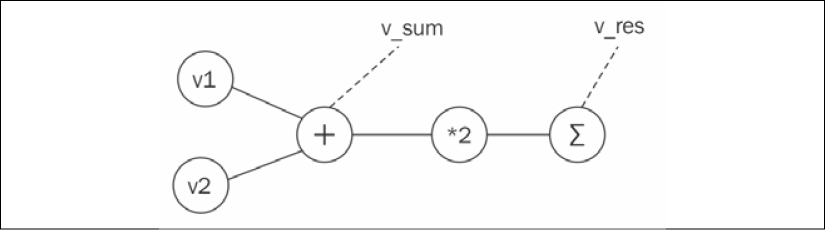


If we check the attributes of our tensors, then we will find that v1 and v2 are the only leaf nodes and every variable, except v2, requires gradients to be calculated:

In [46]:
v1.is_leaf, v2.is_leaf

(True, True)

In [47]:
v_sum.is_leaf, v_res.is_leaf

(False, False)

In [48]:
v1.requires_grad, v2.requires_grad

(True, False)

In [49]:
v_sum.requires_grad

True

In [50]:
v_res.requires_grad

True

In [51]:
# Now, let's tell PyTorch to calculate the gradients of our graph:

v_res.backward()
v1.grad

tensor([2., 2.])

By calling the ```backward``` function, we asked PyTorch to calculate the numerical derivative of the ```v_res``` variable with respect to any variable that our graph has. In other words, what influence do small changes to the ```v_res``` variable have on the rest of the graph? 

In our particular example, the value of two in the gradients of ```v1``` means that by increasing any element of ```v1``` by one, the resulting value of ```v_res``` will grow by two.			

As mentioned, PyTorch calculates gradients only for leaf tensors with ```requires_grad=True```. Indeed, if we try to check the gradients of ```v2```, we get nothing

In [53]:
# v2.grad() # TypeError: 'NoneType' object is not callable